In [55]:
import numpy as np
import pandas as pd
import os
import seaborn as sb
import matplotlib.pyplot as plt

In [56]:
exec_name = "objdump"

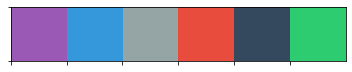

In [95]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
flatui = sb.color_palette(flatui)
sb.palplot(flatui)

In [57]:
path = '/home/david/Documents/gits/fuzztestbench/'
curiouspath = os.path.join(path, exec_name + '/')
aflpath = os.path.join(path, exec_name + '-afl')


In [3]:
curiousdf['date'][0]

NameError: name 'curiousdf' is not defined

In [103]:
curiousdf = pd.read_csv(curiouspath+'/afl_out2/plot_data')
curiousdf['date'] = pd.to_datetime(curiousdf['# unix_time'],unit='s')
curiousdf['delta_time'] = curiousdf['date']-curiousdf['date'][0]
dfcur = curiousdf.set_index('delta_time').resample('0.1T').mean().dropna().reset_index()
dfcur = dfcur[['delta_time', ' paths_total']]
dfcur = dfcur.rename(columns={' paths_total': 'cur_path'})

In [104]:
curiousdf = pd.read_csv(aflpath+'/afl_out/plot_data')
curiousdf['date'] = pd.to_datetime(curiousdf['# unix_time'],unit='s')
curiousdf['delta_time'] = curiousdf['date']-curiousdf['date'][0]
curiousdf.set_index('delta_time').resample('0.1T').mean().dropna().reset_index()
dfafl = curiousdf.set_index('delta_time').resample('0.1T').mean().dropna().reset_index()
dfafl = dfafl[['delta_time', ' paths_total']]
dfafl = dfafl.rename(columns={' paths_total': 'afl_path'})

In [105]:
df = dfcur.merge(dfafl, on='delta_time')
df['delta_time'] = df['delta_time'].dt.total_seconds() / 3600

# tmp: comparing objdump runs

In [106]:
curiouspos = pd.read_csv(curiouspath+'/afl_outp/plot_data') # quartile run
curiousqua = pd.read_csv(curiouspath+'/afl_out/plot_data') # positive run

curiousdf = curiouspos
curiousdf['date'] = pd.to_datetime(curiousdf['# unix_time'],unit='s')
curiousdf['delta_time'] = curiousdf['date']-curiousdf['date'][0]
dfafl = curiousdf.set_index('delta_time').resample('0.1T').mean().dropna().reset_index()
dfafl = dfafl[['delta_time', ' paths_total']]
dfpos = dfafl.rename(columns={' paths_total': 'curious_pos'})

curiousdf = curiousqua
curiousdf['date'] = pd.to_datetime(curiousdf['# unix_time'],unit='s')
curiousdf['delta_time'] = curiousdf['date']-curiousdf['date'][0]
dfafl = curiousdf.set_index('delta_time').resample('0.1T').mean().dropna().reset_index()
dfafl = dfafl[['delta_time', ' paths_total']]
curiousqua = dfafl.rename(columns={' paths_total': 'curious_qua'})


In [107]:
df2 = dfpos.merge(curiousqua, on='delta_time')
df2['delta_time'] = df2['delta_time'].dt.total_seconds() / 3600

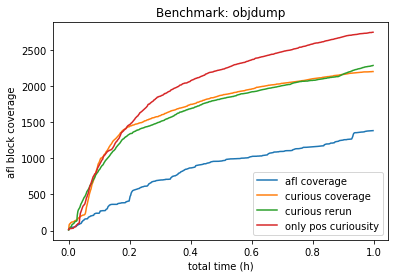

In [120]:
ax = sb.lineplot(x="delta_time", y="afl_path", data=df, label="afl coverage")
ax = sb.lineplot(x="delta_time", y="cur_path", data=df, label="curious coverage")
ax = sb.lineplot(x="delta_time", y="curious_pos", data=df2, label="curious rerun")
ax = sb.lineplot(x="delta_time", y="curious_qua", data=df2, label="only pos curiousity")

ax.set(xlabel='total time (h)', ylabel='afl block coverage')

plt.legend()
plt.title('Benchmark: ' + exec_name)
plt.savefig('./aflreruns.png', dpi = 200)

# Calculating total executions

In [10]:
curiousdf = pd.read_csv(curiouspath+'/afl_out/plot_data')
executions = 0
for index, row in curiousdf.iterrows():
    if index == 0:
        next
    print row["c1"], row["c2"]

,# unix_time,cycles_done,cur_path,paths_total,pending_total,pending_favs,map_size,unique_crashes,unique_hangs,max_depth,execs_per_sec
0,1566889726,0,0,1,1,1,0.60%,0,0,1,1600.00
1,1566889731,340,21,31,0,0,0.90%,0,0,8,946.78
2,1566889736,443,41,79,0,0,1.39%,0,0,14,837.65
3,1566889741,503,84,92,0,0,1.41%,0,0,15,142.03
4,1566889746,564,93,94,0,0,1.41%,0,0,15,602.28
5,1566889752,621,21,108,0,0,1.50%,0,0,15,700.23
6,1566889757,671,71,111,0,0,1.51%,0,0,15,693.06
7,1566889762,725,32,116,0,0,1.52%,0,0,15,724.10
8,1566889767,777,9,118,0,0,1.52%,0,0,15,720.02
9,1566889772,827,79,118,0,0,1.52%,0,0,15,673.81


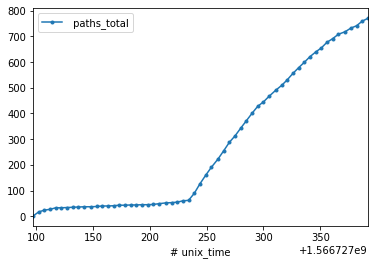

In [22]:
curiousdf.plot(x='# unix_time', y=' paths_total', marker='.')